In [59]:
from tensorflow.keras.layers import  Input,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import  Sequential
from tensorflow.keras.datasets import  fashion_mnist
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow.keras.optimizers import SGD


In [60]:
# load the fashio mnist datasets
data = fashion_mnist.load_data()

In [61]:
# split the data into training and testing datasets
(train_images, train_labels), (test_images, test_labels) = data

In [62]:
#normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [63]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [64]:
def create_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu', padding='same',name="conv1",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same',name="conv2",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same',name="conv3",strides=(2, 2)),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same',name="conv4",strides=(2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

In [65]:
model = create_model()
sgd = SGD(learning_rate=0.01, momentum=0.7)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,250 (1.99 MB)

 Trainable params: 521,290 (1.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [67]:
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7493 - loss: 0.7267 - val_accuracy: 0.8666 - val_loss: 0.3559
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8682 - loss: 0.3603 - val_accuracy: 0.8814 - val_loss: 0.3180
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8890 - loss: 0.3055 - val_accuracy: 0.8814 - val_loss: 0.3134
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9017 - loss: 0.2659 - val_accuracy: 0.8976 - val_loss: 0.2798
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9124 - loss: 0.2402 - val_accuracy: 0.8904 - val_loss: 0.2983
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9195 - loss: 0.2162 - val_accuracy: 0.9042 - val_loss: 0.2693
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9276 - loss: 0.1951 - val_accuracy: 0.9049 - val_loss: 0.2674
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9334 - loss: 0.1752 - val_accuracy: 0

In [68]:
# get the validation loss and accuracy
history = model.history.history
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']
# get the training loss and accuracy
train_loss = history['loss']
train_accuracy = history['accuracy']


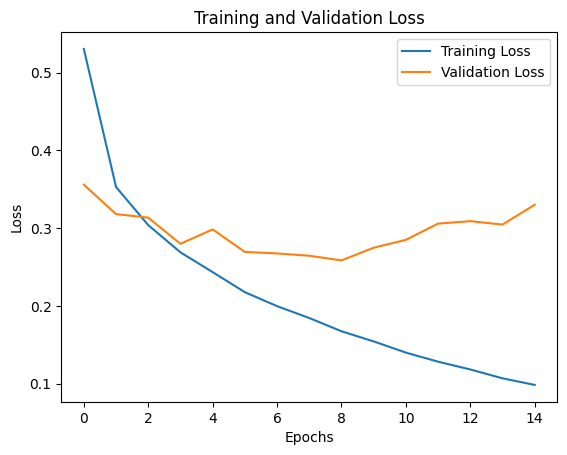

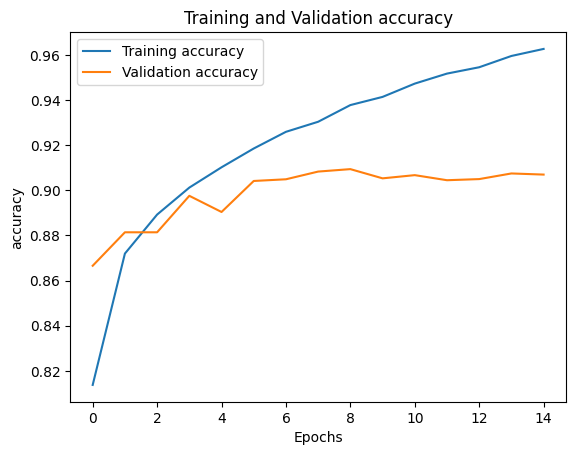

In [69]:
def plot_loss(history):
    # plot the training and validation loss
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history['accuracy'], label='Training accuracy')
    plt.plot(history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


plot_loss(history)
plot_accuracy(history)

In [70]:
dummpy_inputs = tf.random.normal(shape=(1, 28, 28, 1))
model(dummpy_inputs)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.0070076e-18, 2.4523622e-17, 1.8570136e-21, 4.8185934e-17,
        7.9558795e-27, 1.0000000e+00, 2.5377929e-20, 6.4900419e-24,
        4.4653606e-10, 7.1675471e-28]], dtype=float32)>

In [71]:
# evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9008 - loss: 0.3758
Test accuracy: 0.9031000137329102


In [72]:
# predict the test dataset
predictions = model.predict(test_images)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(10000, 10)

In [73]:
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(test_labels, tf.argmax(predictions, axis=1))


<Axes: >

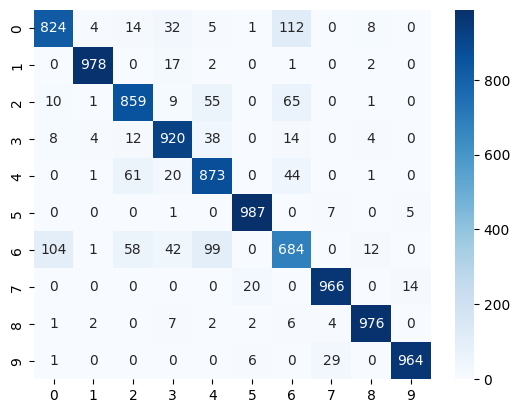

In [74]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

In [75]:
# first conv layer
new_model = tf.keras.Model(inputs=model.layers[0].input, outputs=model.layers[0].output)

In [76]:
# predict on the first 10 images
activations = new_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [77]:
def visualize_extracted_features(activation, layer_name, max_filters=6):
    print(f"{layer_name} activation shape: {activation.shape}")  # Debug info
    fig, axes = plt.subplots(1, max_filters, figsize=(20, 5))
    fig.suptitle(f'Feature maps from {layer_name}', fontsize=16)

    for i in range(max_filters):
        ax = axes[i]
        
        try:
            if activation.ndim == 4:  # (batch, height, width, channels)
                ax.imshow(activation[0, :, :, i], cmap='grey')
            elif activation.ndim == 3:  # (height, width, channels)
                ax.imshow(activation[:, :, i], cmap='grey')
            elif activation.ndim == 2:  # (channels, features)
                ax.imshow(activation[i, :].reshape(1, -1), cmap='grey')
            else:
                ax.text(0.5, 0.5, 'Unsupported shape', ha='center')
        except IndexError:
            ax.text(0.5, 0.5, f'Index {i} out of bounds', ha='center')

        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


conv1 activation shape: (14, 14, 32)


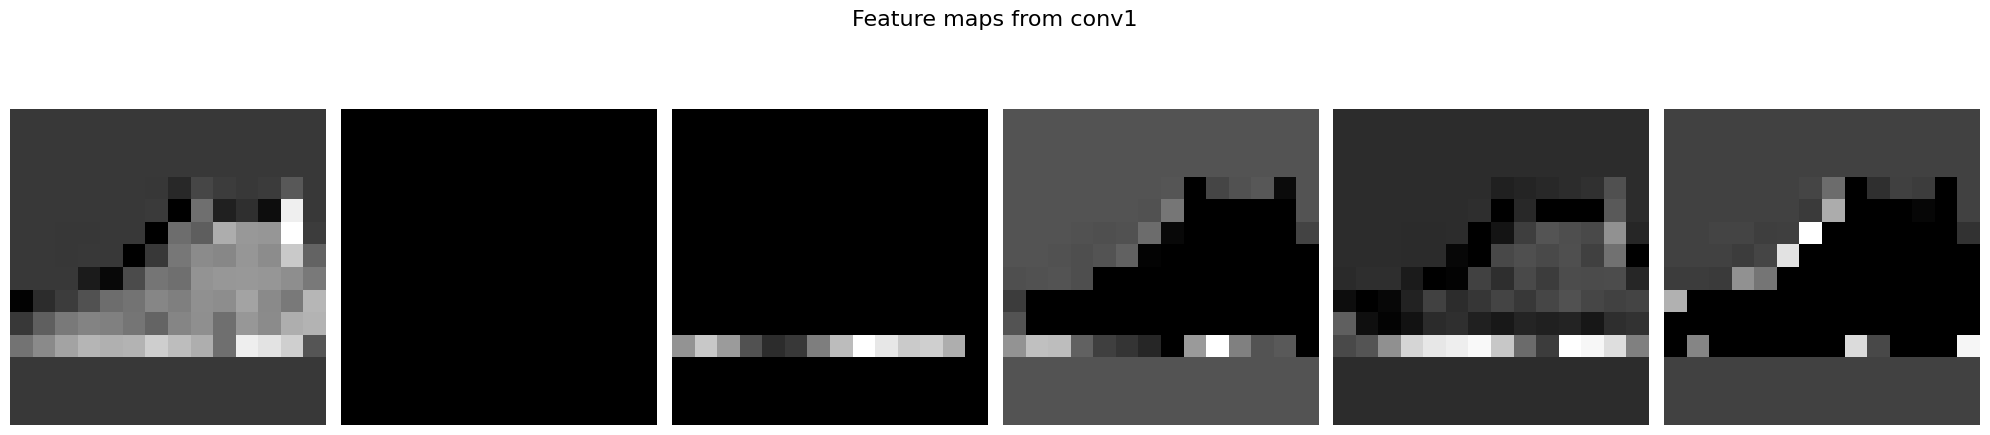

In [78]:
for layer_activation, layer in zip(activations, model.layers):
    visualize_extracted_features(layer_activation, layer.name, max_filters=6)


In [79]:

# Create a new model that outputs the activations of the conv2 layers
conv2_model = tf.keras.Model(inputs=model.layers[0].input, outputs=[layer.output for layer in model.layers if 'conv2' in layer.name])

In [80]:
conv2_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 7, 7, 64)       │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,944 (74.00 KB)

 Trainable params: 18,880 (73.75 KB)

 Non-trainable params: 64 (256.00 B)

In [81]:
# predict on the first 10 images
activations_2 = conv2_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


input_layer_4 activation shape: (7, 7, 64)


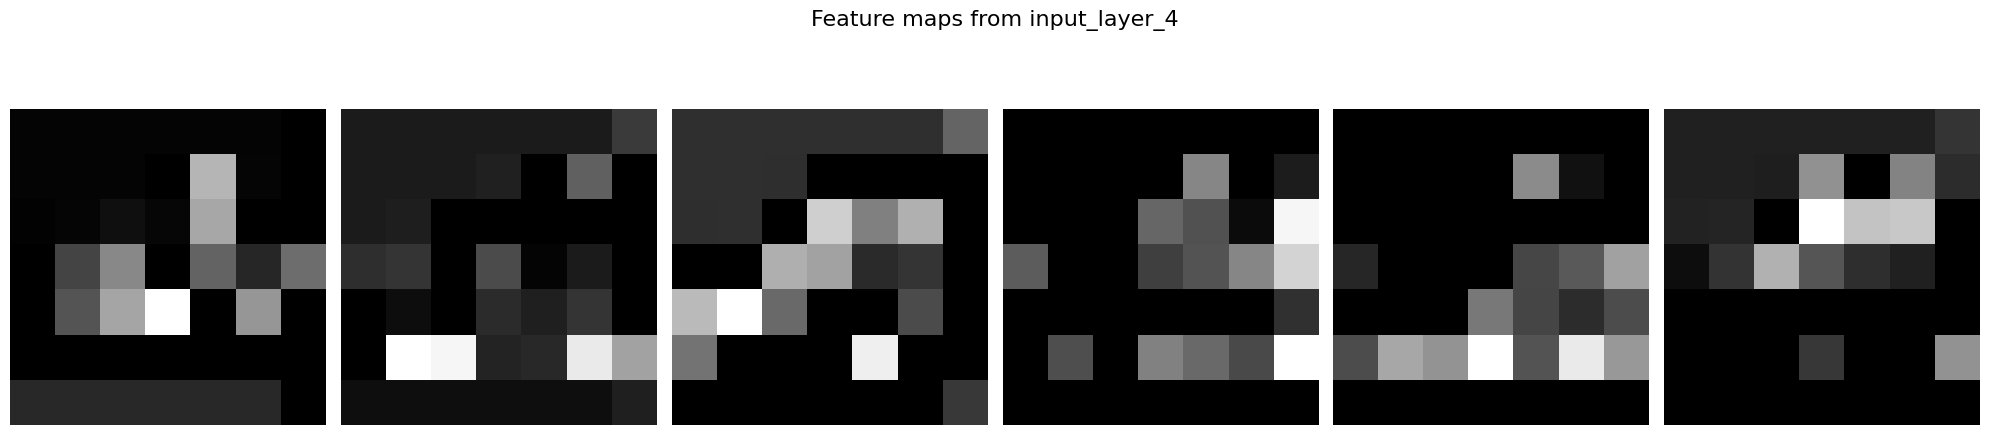

In [82]:
for layer_activation, layer in zip(activations_2, conv2_model.layers):
        visualize_extracted_features(layer_activation, layer.name, max_filters=6)
